# Chest X-Ray Classification

-----

## -> Problem Description
- To classify the given X-Ray image under any one of the following categories:
    - Normal
    - Pneumonia
    - Covid-19
    - Tuberculosis

## -> Dataset Description
- The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Normal/Pneumonia/Covid-19/Tuberculosis). A total of 7135 x-ray images are present.

## -> Models Tried
- Feed-Forward Neural Network
- Convolutional Neural Network
- EfficientNetV2B0

## -> Evaluation Metrics
- Accuracy
- Precision
- Recall
- F1-score

## 1. Importing the Required Libraries

---

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
import random

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

## 2. Getting the data

---

In [4]:
# setting the directory for dataset
train_dir = "Dataset/Chest XRay/train"
val_dir = "Dataset/Chest XRay/val"
test_dir = "Dataset/Chest XRay/test"

In [5]:
def dir_info(dir):
    """
    For getting the directory's information like
        - Directory path
        - No. of subdirectories
        - No. of Files
    """
    for dir_path, dir_name, file_name in os.walk(dir):
        print(f"Directory: {dir_path}\nNo. of Directories: {len(dir_name)}\nNo. of files: {len(file_name)}\n")

In [6]:
dir_info(train_dir)

Directory: Dataset/Chest XRay/train
No. of Directories: 4
No. of files: 0

Directory: Dataset/Chest XRay/train\COVID19
No. of Directories: 0
No. of files: 460

Directory: Dataset/Chest XRay/train\NORMAL
No. of Directories: 0
No. of files: 1341

Directory: Dataset/Chest XRay/train\PNEUMONIA
No. of Directories: 0
No. of files: 3875

Directory: Dataset/Chest XRay/train\TUBERCULOSIS
No. of Directories: 0
No. of files: 650



In [7]:
dir_info(val_dir)

Directory: Dataset/Chest XRay/val
No. of Directories: 4
No. of files: 0

Directory: Dataset/Chest XRay/val\COVID19
No. of Directories: 0
No. of files: 10

Directory: Dataset/Chest XRay/val\NORMAL
No. of Directories: 0
No. of files: 8

Directory: Dataset/Chest XRay/val\PNEUMONIA
No. of Directories: 0
No. of files: 8

Directory: Dataset/Chest XRay/val\TUBERCULOSIS
No. of Directories: 0
No. of files: 12



In [8]:
dir_info(test_dir)

Directory: Dataset/Chest XRay/test
No. of Directories: 4
No. of files: 0

Directory: Dataset/Chest XRay/test\COVID19
No. of Directories: 0
No. of files: 106

Directory: Dataset/Chest XRay/test\NORMAL
No. of Directories: 0
No. of files: 234

Directory: Dataset/Chest XRay/test\PNEUMONIA
No. of Directories: 0
No. of files: 390

Directory: Dataset/Chest XRay/test\TUBERCULOSIS
No. of Directories: 0
No. of files: 41



In [9]:
# getting classnames
class_names = []
for dir_name in os.listdir(train_dir):
    class_names.append(dir_name)

In [10]:
class_names

['COVID19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']

In [11]:
# setting up filenames list
covid_img_paths = []
normal_img_paths = []
pneumonia_img_paths = []
tuberculosis_img_paths = []

In [12]:
def get_filenames(dir):
    """
    Gets filenames under the given directory
    """
    filenames = []
    for dir_name in os.listdir(dir):
        for file_name in os.listdir(dir + "/" + dir_name):
            filenames.append(dir + "/" + dir_name + "/" + file_name)
    return filenames

In [13]:
train_images = get_filenames(train_dir)
train_images[:5]

['Dataset/Chest XRay/train/COVID19/COVID19(0).jpg',
 'Dataset/Chest XRay/train/COVID19/COVID19(1).jpg',
 'Dataset/Chest XRay/train/COVID19/COVID19(10).jpg',
 'Dataset/Chest XRay/train/COVID19/COVID19(100).jpg',
 'Dataset/Chest XRay/train/COVID19/COVID19(101).jpg']

In [14]:
train_images[-5:]

['Dataset/Chest XRay/train/TUBERCULOSIS/Tuberculosis-95.png',
 'Dataset/Chest XRay/train/TUBERCULOSIS/Tuberculosis-96.png',
 'Dataset/Chest XRay/train/TUBERCULOSIS/Tuberculosis-97.png',
 'Dataset/Chest XRay/train/TUBERCULOSIS/Tuberculosis-98.png',
 'Dataset/Chest XRay/train/TUBERCULOSIS/Tuberculosis-99.png']

In [15]:
val_images = get_filenames(val_dir)
val_images[:5]

['Dataset/Chest XRay/val/COVID19/COVID19(566).jpg',
 'Dataset/Chest XRay/val/COVID19/COVID19(567).jpg',
 'Dataset/Chest XRay/val/COVID19/COVID19(568).jpg',
 'Dataset/Chest XRay/val/COVID19/COVID19(569).jpg',
 'Dataset/Chest XRay/val/COVID19/COVID19(570).jpg']

In [16]:
test_images = get_filenames(test_dir)
test_images[:5]

['Dataset/Chest XRay/test/COVID19/COVID19(460).jpg',
 'Dataset/Chest XRay/test/COVID19/COVID19(461).jpg',
 'Dataset/Chest XRay/test/COVID19/COVID19(462).jpg',
 'Dataset/Chest XRay/test/COVID19/COVID19(463).jpg',
 'Dataset/Chest XRay/test/COVID19/COVID19(464).jpg']

### 2.1. Viewing Random Images

In [17]:
def view_random_images(train=False, val=False, test=False):
    """
    Viewing a random image in the specified directory and class
    """

    if train:
        random_index = random.randint(0, len(train_images))
        random_img = train_images[random_index]
    elif val:
        random_index = random.randint(0, len(val_images))
        random_img = val_images[random_index]
    else:
        random_index = random.randint(0, len(test_images))
        random_img = test_images[random_index]

    plt.figure(figsize=(10, 7))
    plt.imshow(plt.imread(random_img))
    plt.title(random_img)
    plt.xticks([])
    plt.yticks([]);

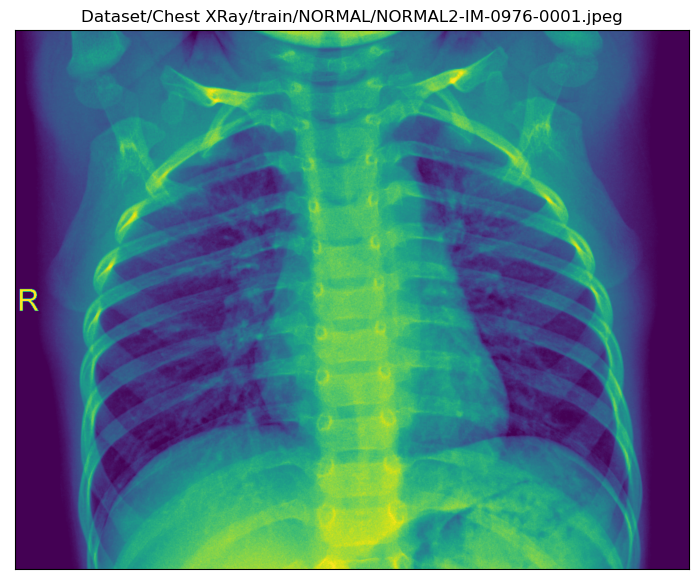

In [18]:
view_random_images(train=True)

## 4. Preprocessing the Images

---

In [19]:
train_images[:2], val_images[:2], test_images[:2]

(['Dataset/Chest XRay/train/COVID19/COVID19(0).jpg',
  'Dataset/Chest XRay/train/COVID19/COVID19(1).jpg'],
 ['Dataset/Chest XRay/val/COVID19/COVID19(566).jpg',
  'Dataset/Chest XRay/val/COVID19/COVID19(567).jpg'],
 ['Dataset/Chest XRay/test/COVID19/COVID19(460).jpg',
  'Dataset/Chest XRay/test/COVID19/COVID19(461).jpg'])

In [20]:
# preprocessing and batching the data
def preprocess_images(path, shuffle=False):
    """
    Preprocess all the images in the given directory
    """
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory=path, batch_size=32, image_size=(224, 224), label_mode="categorical", seed=42, shuffle=shuffle
    )
    return dataset

In [21]:
train_dir, val_dir, test_dir

('Dataset/Chest XRay/train',
 'Dataset/Chest XRay/val',
 'Dataset/Chest XRay/test')

In [22]:
len(train_images)

6326

In [23]:
train_dataset = preprocess_images(train_dir, shuffle=True)
train_dataset, len(train_dataset)

Found 6326 files belonging to 4 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>,
 198)

In [24]:
for img, label in train_dataset.take(1):
    print(img, label)

tf.Tensor(
[[[[ 54.         54.         54.       ]
   [ 55.365753   55.365753   55.365753 ]
   [ 57.449936   57.449936   57.449936 ]
   ...
   [ 40.089214   40.089214   40.089214 ]
   [ 31.660706   31.660706   31.660706 ]
   [ 26.1071     26.1071     26.1071   ]]

  [[ 54.365753   54.365753   54.365753 ]
   [ 56.         56.         56.       ]
   [ 59.660713   59.660713   59.660713 ]
   ...
   [ 42.535645   42.535645   42.535645 ]
   [ 34.757957   34.757957   34.757957 ]
   [ 28.214243   28.214243   28.214243 ]]

  [[ 55.425064   55.425064   55.425064 ]
   [ 56.921238   56.921238   56.921238 ]
   [ 58.464287   58.464287   58.464287 ]
   ...
   [ 41.946102   41.946102   41.946102 ]
   [ 38.857124   38.857124   38.857124 ]
   [ 30.321384   30.321384   30.321384 ]]

  ...

  [[ 29.735626   29.735626   29.735626 ]
   [ 30.646051   30.646051   30.646051 ]
   [ 29.         29.         29.       ]
   ...
   [ 32.         32.         32.       ]
   [ 32.646057   32.646057   32.646057 ]
   [ 

In [25]:
val_dataset = preprocess_images(val_dir, shuffle=True)
val_dataset, len(val_dataset)

Found 38 files belonging to 4 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>,
 2)

In [26]:
test_dataset = preprocess_images(test_dir, shuffle=False) # shuffle-False for evaluation
test_dataset, len(test_dataset)

Found 771 files belonging to 4 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>,
 25)

In [27]:
# viewing a dataset batch
for img, label in test_dataset.take(1):
    print(img, label)

tf.Tensor(
[[[[ 68.69132    68.69132    68.69132  ]
   [ 58.943554   58.943554   58.943554 ]
   [ 52.822704   52.822704   52.822704 ]
   ...
   [ 25.025263   25.025263   25.025263 ]
   [ 23.593119   23.593119   23.593119 ]
   [ 27.797657   27.797657   27.797657 ]]

  [[ 52.856026   52.856026   52.856026 ]
   [ 48.977524   48.977524   48.977524 ]
   [ 50.342316   50.342316   50.342316 ]
   ...
   [ 19.356934   19.356934   19.356934 ]
   [ 19.394068   19.394068   19.394068 ]
   [ 20.951147   20.951147   20.951147 ]]

  [[ 46.404015   46.404015   46.404015 ]
   [ 43.880585   43.880585   43.880585 ]
   [ 43.029182   43.029182   43.029182 ]
   ...
   [ 18.830297   18.830297   18.830297 ]
   [ 18.101799   18.101799   18.101799 ]
   [ 19.07129    19.07129    19.07129  ]]

  ...

  [[179.8865    179.8865    179.8865   ]
   [187.31244   187.31244   187.31244  ]
   [199.5052    199.5052    199.5052   ]
   ...
   [ 31.354828   31.354828   31.354828 ]
   [ 34.631355   34.631355   34.631355 ]
   [ 

## 5. Creating Callbacks and Evaluation function

---
- **Callbacks:**
    - ModelCheckpoint
    - Tensorboard
- **Evaluation Metrics:**
    - Accuracy
    - Precision
    - Recall
    - F1-score

In [28]:
# creating ModelCheckpoint callback
def create_model_checkpoint(model_name):
    filepath="callbacks/model_checkpoint/" + model_name
    return tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor="val_loss", save_best_only=True)

# creating tensorboard callback
def create_tensorboard_callback(model_name, file_path="callbacks/tensorboard/"):
    return tf.keras.callbacks.TensorBoard(log_dir=file_path + model_name)

In [29]:
# creating Evaluation function
def evaluate_preds(y_true, y_preds):
    """
    Returns Accuracy, Precision, Recall, F1-score for a given model using its predictions and actual values
    """

    acc = accuracy_score(y_true, y_preds)
    pre, rec, f1, _ = precision_recall_fscore_support(y_true, y_preds)

    # since it is a multi-class classification problem, we need to take mean precision, recall and f1 score
    pre = np.mean(pre)
    rec = np.mean(rec)
    f1 = np.mean(f1)

    return {
        "accuracy_score": acc,
        "precision": pre,
        "recall": rec,
        "f1_score": f1
    }

In [30]:
def plot_loss_curves(history):
    """
    Plots the given model's loss curve
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    epochs = history.epoch
    plt.figure()
    plt.plot(epochs, loss, c="orange", label="Train Loss")
    plt.plot(epochs, val_loss, c="red", label="Validation Loss")
    plt.xlabel("\nEpochs")
    plt.ylabel("Loss\n")
    plt.title("Train Loss vs Validation Loss\n")
    plt.legend();

    plt.figure()
    plt.plot(epochs, acc, c="orange", label="Train Accuracy")
    plt.plot(epochs, val_acc, c="red", label="Validation Accuracy")
    plt.xlabel("\nEpochs")
    plt.ylabel("Accuracy\n")
    plt.title("Train Accuracy vs Validation Accuracy\n")
    plt.legend();

In [31]:
# getting labels for test data
test_labels = []

for img, label in test_dataset.unbatch():
    test_labels.append(label.numpy().argmax())
len(test_labels)

771

In [32]:
test_labels[:5], test_labels[-5:]

([0, 0, 0, 0, 0], [3, 3, 3, 3, 3])

## 6. Model Creation

---

### 6.1. Feed-Forward Neural Network

In [33]:
# setting random seed
tf.random.set_seed(42)

# creating a neural network with dense layers
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1/255.),
    tf.keras.layers.Flatten(), # needs to be flattened
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
], name="model_1_Dense")

# compiling the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# fitting the model
model_1_history = model_1.fit(train_dataset, epochs=30, validation_data=val_dataset, callbacks=[create_model_checkpoint(model_name=model_1.name), create_tensorboard_callback(model_1.name)])

Epoch 1/30
198/198 [==============================] - 11s 49ms/step - loss: 1.0816 - accuracy: 0.7539 - val_loss: 1.2919 - val_accuracy: 0.6579
Epoch 2/30
198/198 [==============================] - 9s 45ms/step - loss: 0.6231 - accuracy: 0.8212 - val_loss: 2.8283 - val_accuracy: 0.5789
Epoch 3/30
198/198 [==============================] - 10s 46ms/step - loss: 0.3747 - accuracy: 0.8791 - val_loss: 1.7584 - val_accuracy: 0.7105
Epoch 4/30
198/198 [==============================] - 10s 48ms/step - loss: 0.2746 - accuracy: 0.9082 - val_loss: 1.4634 - val_accuracy: 0.7105
Epoch 5/30
198/198 [==============================] - 10s 46ms/step - loss: 0.2575 - accuracy: 0.9113 - val_loss: 0.5885 - val_accuracy: 0.7632
Epoch 6/30
198/198 [==============================] - 9s 43ms/step - loss: 0.3261 - accuracy: 0.8889 - val_loss: 0.8465 - val_accuracy: 0.7105
Epoch 7/30
198/198 [==============================] - 9s 43ms/step - loss: 0.2557 - accuracy: 0.9104 - val_loss: 0.6729 - val_accuracy: 0.

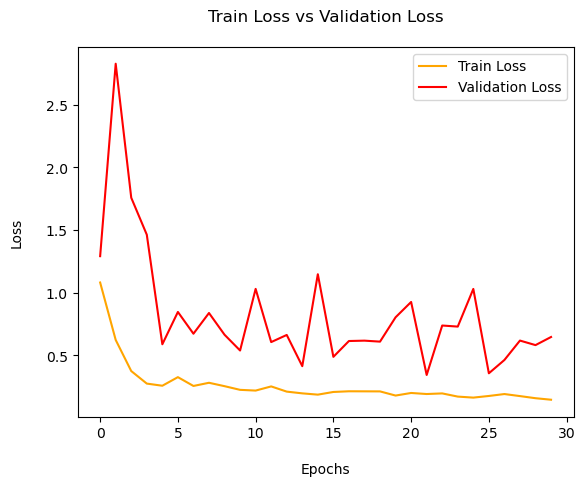

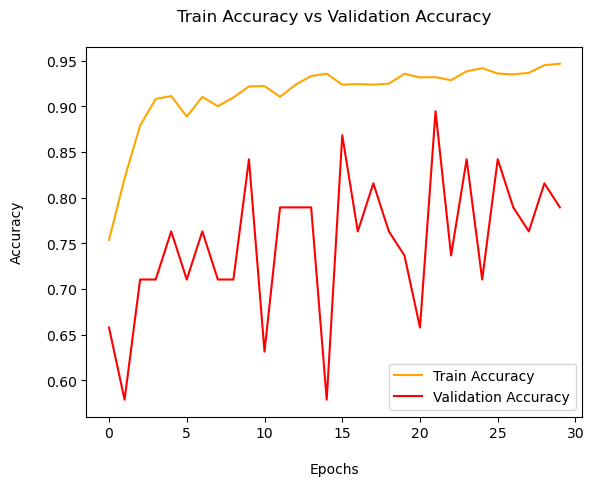

In [34]:
# plotting loss curves
plot_loss_curves(model_1_history)

#### 6.1.1. Evaluating the model

In [35]:
model_1.evaluate(test_dataset)

25/25 [==============================] - 1s 41ms/step - loss: 1.3128 - accuracy: 0.7393


[1.3128058910369873, 0.7392995953559875]

In [36]:
# loading the best performed model
MODEL_CHECKPOINT_FILEPATH = "callbacks/model_checkpoint/"
model_1 = tf.keras.models.load_model(MODEL_CHECKPOINT_FILEPATH+model_1.name)
model_1.evaluate(test_dataset)

25/25 [==============================] - 1s 42ms/step - loss: 1.0269 - accuracy: 0.7419


[1.0269206762313843, 0.7418936491012573]

In [37]:
%%time
# making predictions
model_1_pred_probs = model_1.predict(test_dataset)
model_1_pred_probs[:5]

25/25 [==============================] - 1s 40ms/step
Wall time: 1.34 s


array([[4.1701728e-01, 7.4957665e-05, 3.2602507e-01, 2.5688273e-01],
       [9.9718720e-01, 5.0677538e-09, 9.6272642e-04, 1.8500758e-03],
       [8.2274640e-01, 3.7974190e-02, 6.5701216e-02, 7.3578149e-02],
       [1.1954643e-02, 6.1280930e-01, 2.7077693e-02, 3.4815839e-01],
       [5.9907496e-01, 1.3994070e-06, 1.0713175e-02, 3.9021048e-01]],
      dtype=float32)

In [38]:
model_1_pred_probs.shape, model_1_pred_probs[0:2]

((771, 4),
 array([[4.1701728e-01, 7.4957665e-05, 3.2602507e-01, 2.5688273e-01],
        [9.9718720e-01, 5.0677538e-09, 9.6272642e-04, 1.8500758e-03]],
       dtype=float32))

In [39]:
# making labels for prediction probabilities
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 1, 0], dtype=int64)>

In [40]:
len(model_1_preds), len(test_labels)

(771, 771)

In [41]:
# calculating results
model_1_results = evaluate_preds(y_true=test_labels, y_preds=model_1_preds)
model_1_results

{'accuracy_score': 0.74189364461738,
 'precision': 0.7570653016142105,
 'recall': 0.743077729398484,
 'f1_score': 0.6761310159122385}

### 6.2. Convolutional Neural Network

In [66]:
# setting random seed
tf.random.set_seed(42)

# creating a Conv2D model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1/255.),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
], name="model_2_Conv2D")

# compiling the model
model_2.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# fitting the model
model_2_history = model_2.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[create_model_checkpoint(model_name=model_2.name), create_tensorboard_callback(model_name=model_2.name)])

Epoch 1/10
197/198 [============================>.] - ETA: 0s - loss: 0.3530 - accuracy: 0.8756

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


198/198 [==============================] - 16s 71ms/step - loss: 0.3525 - accuracy: 0.8756 - val_loss: 0.8539 - val_accuracy: 0.7632
Epoch 2/10
197/198 [============================>.] - ETA: 0s - loss: 0.1420 - accuracy: 0.9494

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


198/198 [==============================] - 14s 70ms/step - loss: 0.1421 - accuracy: 0.9493 - val_loss: 0.5607 - val_accuracy: 0.7368
Epoch 3/10
197/198 [============================>.] - ETA: 0s - loss: 0.1084 - accuracy: 0.9645

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


198/198 [==============================] - 14s 70ms/step - loss: 0.1082 - accuracy: 0.9646 - val_loss: 0.2492 - val_accuracy: 0.8684
Epoch 4/10
197/198 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9772

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


198/198 [==============================] - 15s 71ms/step - loss: 0.0733 - accuracy: 0.9772 - val_loss: 0.1662 - val_accuracy: 0.8947
Epoch 5/10
198/198 [==============================] - 14s 66ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.3474 - val_accuracy: 0.8421
Epoch 6/10
197/198 [============================>.] - ETA: 0s - loss: 0.0510 - accuracy: 0.9826

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D\assets


198/198 [==============================] - 14s 71ms/step - loss: 0.0521 - accuracy: 0.9823 - val_loss: 0.0605 - val_accuracy: 0.9737
Epoch 7/10
198/198 [==============================] - 14s 65ms/step - loss: 0.0318 - accuracy: 0.9904 - val_loss: 0.0924 - val_accuracy: 0.9474
Epoch 8/10
198/198 [==============================] - 14s 66ms/step - loss: 0.0196 - accuracy: 0.9924 - val_loss: 0.1203 - val_accuracy: 0.9211
Epoch 9/10
198/198 [==============================] - 14s 66ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.2389 - val_accuracy: 0.8684
Epoch 10/10
198/198 [==============================] - 14s 67ms/step - loss: 0.0331 - accuracy: 0.9889 - val_loss: 0.1172 - val_accuracy: 0.9474


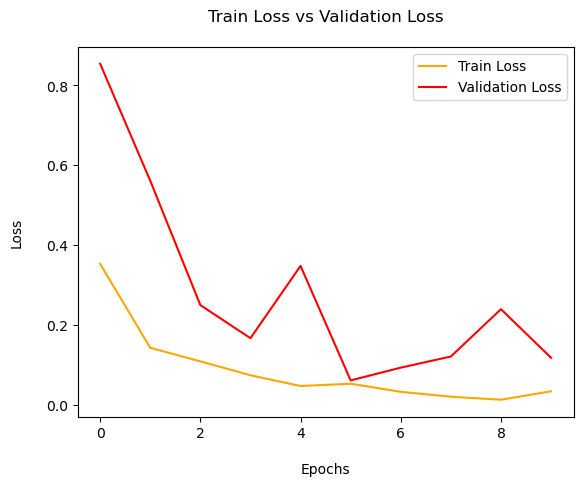

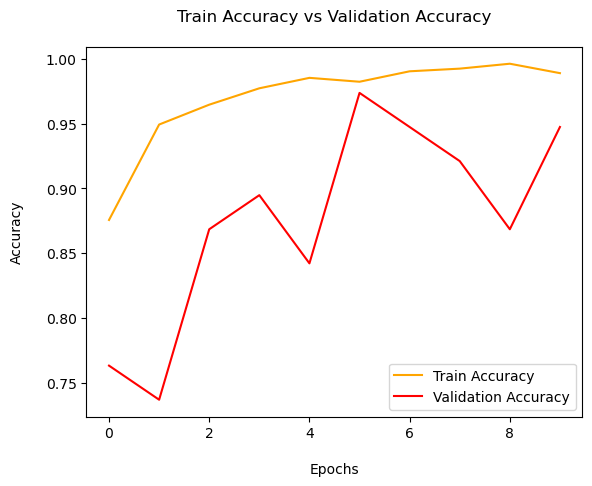

In [67]:
# plotting loss curves
plot_loss_curves(model_2_history)

#### 6.2.1. Evaluating the model

In [68]:
model_2.evaluate(test_dataset)

25/25 [==============================] - 1s 42ms/step - loss: 1.7585 - accuracy: 0.7652


[1.7585006952285767, 0.765239953994751]

In [69]:
# loading the best performed model
model_2 = tf.keras.models.load_model(MODEL_CHECKPOINT_FILEPATH+model_2.name)
model_2.evaluate(test_dataset)

25/25 [==============================] - 2s 43ms/step - loss: 0.9162 - accuracy: 0.8106


[0.9161871075630188, 0.8106355667114258]

In [70]:
%%time
# making predictions
model_2_pred_probs = model_2.predict(test_dataset)
model_2_pred_probs[:5]

25/25 [==============================] - 1s 38ms/step
Wall time: 1.27 s


array([[9.8771274e-01, 9.1303466e-03, 3.1567339e-03, 1.1897472e-07],
       [9.9996471e-01, 2.5670038e-06, 1.6786556e-05, 1.5925252e-05],
       [9.9526113e-01, 8.6223394e-05, 2.1628024e-05, 4.6310606e-03],
       [6.8766159e-01, 2.1258194e-03, 4.2512576e-04, 3.0978745e-01],
       [9.8889881e-01, 5.3092372e-04, 6.9915676e-03, 3.5786177e-03]],
      dtype=float32)

In [71]:
# making labels for prediction probabilities
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0], dtype=int64)>

In [72]:
# calculating results
model_2_results = evaluate_preds(test_labels, model_2_preds)
model_2_results
# better than model 1

{'accuracy_score': 0.8106355382619974,
 'precision': 0.8253579100562343,
 'recall': 0.8290782171246966,
 'f1_score': 0.8029910286443341}

In [73]:
model_1_results

{'accuracy_score': 0.74189364461738,
 'precision': 0.7570653016142105,
 'recall': 0.743077729398484,
 'f1_score': 0.6761310159122385}

#### 6.2.2. Creating a Conv2D model with Extra layers and hidden units

In [50]:
# setting random seed
tf.random.set_seed(42)

# creating a Conv2D model
model_2_modified = tf.keras.Sequential([
    tf.keras.layers.Rescaling(scale=1/255.),

    tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
], name="model_2_Conv2D_modified")

# compiling the model
model_2_modified.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# fitting the model
model_2_modified_history = model_2_modified.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[create_model_checkpoint(model_name=model_2_modified.name), create_tensorboard_callback(model_name=model_2_modified.name)])

Epoch 1/10
198/198 [==============================] - ETA: 0s - loss: 0.4891 - accuracy: 0.8146

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


198/198 [==============================] - 28s 129ms/step - loss: 0.4891 - accuracy: 0.8146 - val_loss: 0.4022 - val_accuracy: 0.8684
Epoch 2/10
198/198 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9240

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


198/198 [==============================] - 25s 122ms/step - loss: 0.2049 - accuracy: 0.9240 - val_loss: 0.2902 - val_accuracy: 0.8158
Epoch 3/10
198/198 [==============================] - 23s 115ms/step - loss: 0.1501 - accuracy: 0.9469 - val_loss: 0.3164 - val_accuracy: 0.8684
Epoch 4/10
198/198 [==============================] - ETA: 0s - loss: 0.1091 - accuracy: 0.9611

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


198/198 [==============================] - 24s 120ms/step - loss: 0.1091 - accuracy: 0.9611 - val_loss: 0.1386 - val_accuracy: 0.9737
Epoch 5/10
198/198 [==============================] - ETA: 0s - loss: 0.0937 - accuracy: 0.9649

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


198/198 [==============================] - 24s 121ms/step - loss: 0.0937 - accuracy: 0.9649 - val_loss: 0.0751 - val_accuracy: 1.0000
Epoch 6/10
198/198 [==============================] - 23s 115ms/step - loss: 0.0696 - accuracy: 0.9757 - val_loss: 0.1761 - val_accuracy: 0.9211
Epoch 7/10
198/198 [==============================] - 23s 114ms/step - loss: 0.0495 - accuracy: 0.9828 - val_loss: 0.0803 - val_accuracy: 0.9474
Epoch 8/10
198/198 [==============================] - 23s 114ms/step - loss: 0.0419 - accuracy: 0.9858 - val_loss: 0.3667 - val_accuracy: 0.8421
Epoch 9/10
198/198 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9866

INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


INFO:tensorflow:Assets written to: callbacks/model_checkpoint\model_2_Conv2D_modified\assets


198/198 [==============================] - 24s 119ms/step - loss: 0.0379 - accuracy: 0.9866 - val_loss: 0.0497 - val_accuracy: 1.0000
Epoch 10/10
198/198 [==============================] - 23s 114ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.1423 - val_accuracy: 0.8947


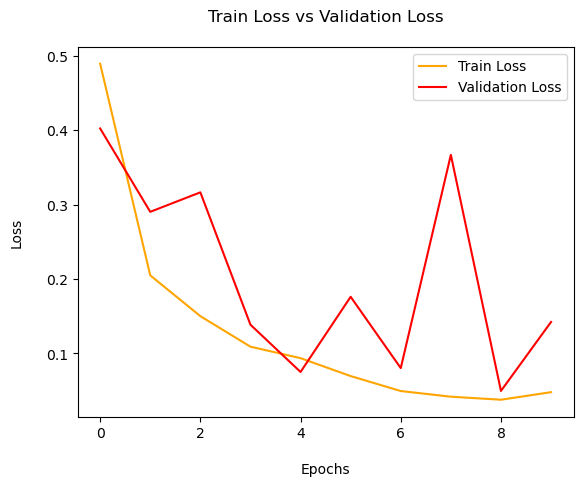

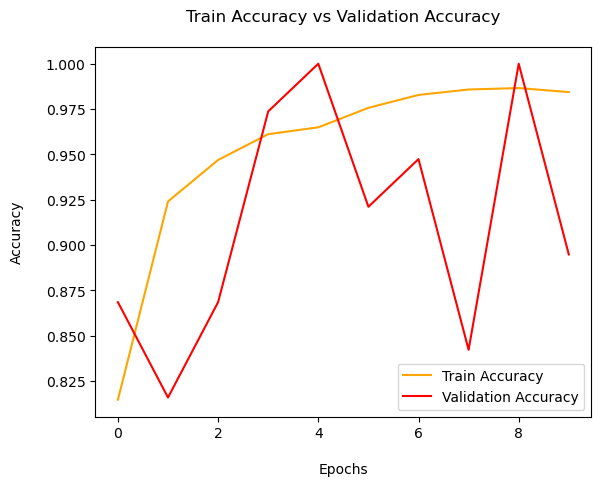

In [51]:
# plotting loss curves
plot_loss_curves(model_2_modified_history)

#### 6.2.2. Evaluating Modified model

In [52]:
model_2_modified.evaluate(test_dataset)

25/25 [==============================] - 2s 52ms/step - loss: 1.2866 - accuracy: 0.7821


[1.286561369895935, 0.7821011543273926]

In [53]:
# loading the best performed model
model_2_modified = tf.keras.models.load_model(MODEL_CHECKPOINT_FILEPATH+model_2_modified.name)
model_2_modified.evaluate(test_dataset)

25/25 [==============================] - 2s 48ms/step - loss: 1.6867 - accuracy: 0.7808


[1.6866633892059326, 0.7808041572570801]

In [54]:
%%time
# making predictions
model_2_modified_pred_probs = model_2_modified.predict(test_dataset)
model_2_modified_pred_probs[:5]

25/25 [==============================] - 2s 52ms/step
Wall time: 1.62 s


array([[9.9994886e-01, 5.7086172e-06, 4.4876415e-05, 4.9635253e-07],
       [9.9970180e-01, 1.3635331e-05, 2.1118081e-04, 7.3370771e-05],
       [9.9757344e-01, 2.3398828e-04, 9.7156712e-04, 1.2210122e-03],
       [9.5606911e-01, 2.5169182e-04, 6.9849350e-04, 4.2980749e-02],
       [8.9832389e-01, 2.4559567e-04, 1.6199118e-02, 8.5231423e-02]],
      dtype=float32)

In [55]:
# making labels for prediction probabilities
model_2_modified_preds = tf.argmax(model_2_modified_pred_probs, axis=1)
model_2_modified_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0], dtype=int64)>

In [56]:
# calculating results
model_2_modified_results = evaluate_preds(test_labels, model_2_modified_preds)
model_2_modified_results
# modified model 2 also not performed so good when compared to model_2

{'accuracy_score': 0.7808041504539559,
 'precision': 0.8347532738638626,
 'recall': 0.7813893117160489,
 'f1_score': 0.76967444202438}

In [74]:
model_2_results
# better model

{'accuracy_score': 0.8106355382619974,
 'precision': 0.8253579100562343,
 'recall': 0.8290782171246966,
 'f1_score': 0.8029910286443341}

### 6.3. EfficientNetV2B0

#### 6.3.1. Feature Extractor

In [58]:
efficient_net_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
efficient_net_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling_3[0][0]']            
                                3)                                                

In [60]:
# setting training as false for EfficientNetV2B0 layers and using inference mode
efficient_net_model.trainable = False

In [61]:
# setting random seed
tf.random.set_seed(42)

# creating the feature extraction model using keras functional API
inputs = tf.keras.Input(shape=(224, 224, 3), name="Input_Layer")
x = efficient_net_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
output = tf.keras.layers.Dense(4, activation="softmax", name="Output_Layer")(x)

model_3 = tf.keras.Model(inputs, output, name="EfficientNetV2B0_feature_extractor")

# compiling the model
model_3.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# fitting the model
model_3_history = model_3.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[create_tensorboard_callback(model_name=model_3.name)])

Epoch 1/10
198/198 [==============================] - 22s 84ms/step - loss: 0.2708 - accuracy: 0.9290 - val_loss: 0.5381 - val_accuracy: 0.8158
Epoch 2/10
198/198 [==============================] - 16s 77ms/step - loss: 0.0669 - accuracy: 0.9788 - val_loss: 0.5472 - val_accuracy: 0.8947
Epoch 3/10
198/198 [==============================] - 16s 78ms/step - loss: 0.0333 - accuracy: 0.9904 - val_loss: 0.2592 - val_accuracy: 0.9211
Epoch 4/10
198/198 [==============================] - 16s 76ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.3364 - val_accuracy: 0.9211
Epoch 5/10
198/198 [==============================] - 16s 77ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.3444 - val_accuracy: 0.9211
Epoch 6/10
198/198 [==============================] - 16s 77ms/step - loss: 7.7873e-04 - accuracy: 1.0000 - val_loss: 0.3464 - val_accuracy: 0.9211
Epoch 7/10
198/198 [==============================] - 16s 77ms/step - loss: 5.4505e-04 - accuracy: 1.0000 - val_loss: 0.3506 - val_a

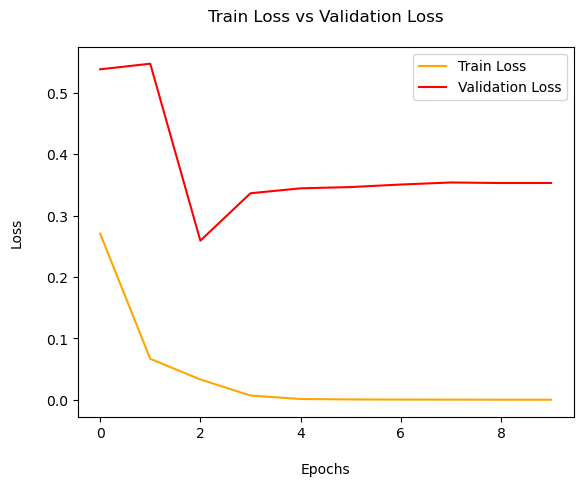

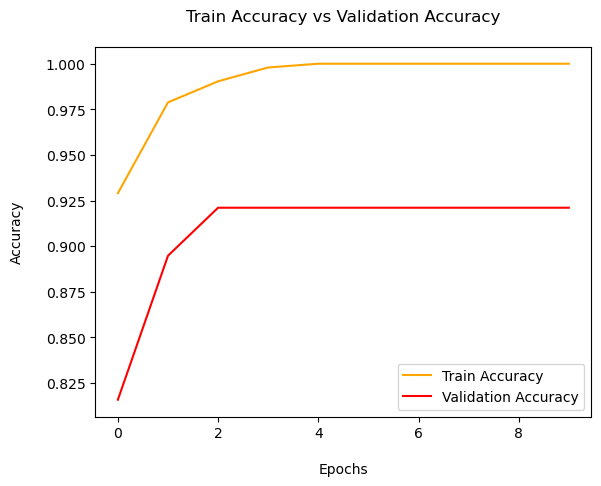

In [62]:
# plotting loss curves
plot_loss_curves(model_3_history)

#### 6.3.2. Evaluating the Feature Extractor model

In [63]:
model_3.evaluate(test_dataset)

25/25 [==============================] - 3s 81ms/step - loss: 1.2306 - accuracy: 0.8262


[1.23055899143219, 0.8261997699737549]

In [75]:
%%time
# making predictions
model_3_pred_probs = model_3.predict(test_dataset)
model_3_pred_probs[:5]

25/25 [==============================] - 3s 85ms/step
Wall time: 3.06 s


array([[1.0000000e+00, 1.2906206e-15, 1.1200425e-12, 6.1383478e-31],
       [1.0000000e+00, 3.4885611e-14, 1.7007316e-09, 3.9475069e-24],
       [9.9969327e-01, 5.5076518e-05, 2.5114696e-04, 5.0359137e-07],
       [9.9999952e-01, 6.5616583e-09, 5.2011262e-07, 1.8509152e-15],
       [1.0000000e+00, 6.2005793e-14, 3.1864808e-10, 4.6054130e-24]],
      dtype=float32)

In [76]:
# making labels for prediction probabilities
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0], dtype=int64)>

In [77]:
# calculating results
model_3_feature_extractor_results = evaluate_preds(test_labels, model_3_preds)
model_3_feature_extractor_results
# significant improvement over previous models

{'accuracy_score': 0.8261997405966277,
 'precision': 0.9319734723484305,
 'recall': 0.8542573778422835,
 'f1_score': 0.8615965986767162}

In [80]:
model_2_modified_results

{'accuracy_score': 0.7808041504539559,
 'precision': 0.8347532738638626,
 'recall': 0.7813893117160489,
 'f1_score': 0.76967444202438}

In [78]:
model_2_results

{'accuracy_score': 0.8106355382619974,
 'precision': 0.8253579100562343,
 'recall': 0.8290782171246966,
 'f1_score': 0.8029910286443341}

In [79]:
model_1_results

{'accuracy_score': 0.74189364461738,
 'precision': 0.7570653016142105,
 'recall': 0.743077729398484,
 'f1_score': 0.6761310159122385}

#### 6.3.3. Fine Tuning

In [81]:
len(efficient_net_model.layers)

270

In [82]:
efficient_net_model.trainable = False

In [83]:
# checking whether the model is in Inference mode
for ind, layer in enumerate(efficient_net_model.layers):
    print(f"{ind}  ->  {layer}  ->  Trainable: {layer.trainable}")

0  ->  <keras.engine.input_layer.InputLayer object at 0x000002966716F460>  ->  Trainable: False
1  ->  <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x000002966716F340>  ->  Trainable: False
2  ->  <keras.layers.preprocessing.normalization.Normalization object at 0x000002966716F670>  ->  Trainable: False
3  ->  <keras.layers.convolutional.conv2d.Conv2D object at 0x000002974AEA7F40>  ->  Trainable: False
4  ->  <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000296F2AFD750>  ->  Trainable: False
5  ->  <keras.layers.core.activation.Activation object at 0x00000296644A7FD0>  ->  Trainable: False
6  ->  <keras.layers.convolutional.conv2d.Conv2D object at 0x00000296E21C8610>  ->  Trainable: False
7  ->  <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000296671B42E0>  ->  Trainable: False
8  ->  <keras.layers.core.activation.Activation object at 0x00000296EB8304C0>  ->  Trainable: False
9  ->  <keras.laye

In [84]:
# making some layers of EfficientNetV2B0 available for training
efficient_net_model.trainable = True
for layer in efficient_net_model.layers[:-5]:
    layer.trainable = False

In [85]:
# checking whether the last 5 layers are available for training
for ind, layer in enumerate(efficient_net_model.layers):
    print(f"{ind}  ->  {layer}  ->  Trainable: {layer.trainable}")

0  ->  <keras.engine.input_layer.InputLayer object at 0x000002966716F460>  ->  Trainable: False
1  ->  <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x000002966716F340>  ->  Trainable: False
2  ->  <keras.layers.preprocessing.normalization.Normalization object at 0x000002966716F670>  ->  Trainable: False
3  ->  <keras.layers.convolutional.conv2d.Conv2D object at 0x000002974AEA7F40>  ->  Trainable: False
4  ->  <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000296F2AFD750>  ->  Trainable: False
5  ->  <keras.layers.core.activation.Activation object at 0x00000296644A7FD0>  ->  Trainable: False
6  ->  <keras.layers.convolutional.conv2d.Conv2D object at 0x00000296E21C8610>  ->  Trainable: False
7  ->  <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x00000296671B42E0>  ->  Trainable: False
8  ->  <keras.layers.core.activation.Activation object at 0x00000296EB8304C0>  ->  Trainable: False
9  ->  <keras.laye

In [86]:
# setting random seed
tf.random.set_seed(42)

# Fine-tuning using keras functional API
inputs = tf.keras.Input(shape=(224, 224, 3), name="Input_Layer")
x = efficient_net_model(inputs, training=True)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
output = tf.keras.layers.Dense(4, activation="softmax", name="Output_Layer")(x)

model_3_fine_tuned = tf.keras.Model(inputs, output, name="EfficientNetV2B0_fine_tuned")

# compiling the model
model_3_fine_tuned.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # decreasing learning rate for fine-tuning
    metrics=["accuracy"]
)

# fitting the model
model_3_fine_tuned_history = model_3_fine_tuned.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[create_tensorboard_callback(model_name=model_3_fine_tuned.name)])

Epoch 1/10
198/198 [==============================] - 23s 86ms/step - loss: 0.1451 - accuracy: 0.9463 - val_loss: 0.2014 - val_accuracy: 0.9211
Epoch 2/10
198/198 [==============================] - 16s 79ms/step - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.1468 - val_accuracy: 0.8947
Epoch 3/10
198/198 [==============================] - 16s 80ms/step - loss: 0.0187 - accuracy: 0.9945 - val_loss: 0.3085 - val_accuracy: 0.9474
Epoch 4/10
198/198 [==============================] - 16s 80ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.2507 - val_accuracy: 0.9474
Epoch 5/10
198/198 [==============================] - 16s 79ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.2722 - val_accuracy: 0.9211
Epoch 6/10
198/198 [==============================] - 17s 81ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.2654 - val_accuracy: 0.8947
Epoch 7/10
198/198 [==============================] - 17s 81ms/step - loss: 0.0044 - accuracy: 0.9981 - val_loss: 0.3143 - val_accuracy:

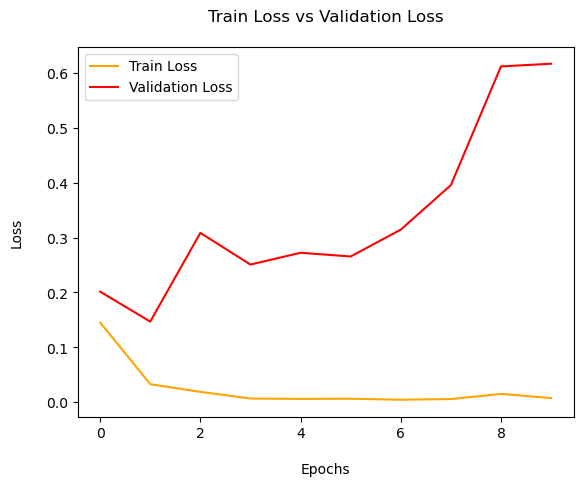

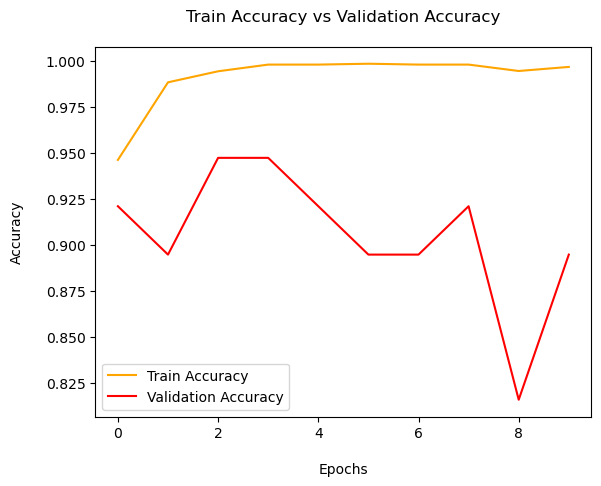

In [87]:
# plot loss curves
plot_loss_curves(model_3_fine_tuned_history)

#### 6.3.4. Evaluating the Fine-tuned Model

In [88]:
model_3_fine_tuned.evaluate(test_dataset)

25/25 [==============================] - 3s 79ms/step - loss: 1.9124 - accuracy: 0.7523


[1.9124250411987305, 0.7522698044776917]

In [89]:
%%time
# making predictions
model_3_fine_tuned_pred_probs = model_3_fine_tuned.predict(test_dataset)
model_3_fine_tuned_pred_probs[:5]

25/25 [==============================] - 4s 87ms/step
Wall time: 3.85 s


array([[9.9925667e-01, 1.1682465e-05, 7.2950643e-04, 2.0751531e-06],
       [9.9791199e-01, 1.5395226e-05, 2.0575351e-03, 1.5053232e-05],
       [3.1398532e-01, 1.3478149e-01, 2.4990964e-01, 3.0132353e-01],
       [2.3280291e-02, 3.7131170e-03, 8.6750549e-01, 1.0550112e-01],
       [9.9999762e-01, 1.2751833e-06, 1.3385140e-07, 9.7361919e-07]],
      dtype=float32)

In [90]:
# making labels for prediction probabilities
model_3_fine_tuned_preds = tf.argmax(model_3_fine_tuned_pred_probs, axis=1)
model_3_fine_tuned_preds[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 2, 0], dtype=int64)>

In [91]:
# calculating results
model_3_fine_tuned_results = evaluate_preds(test_labels, model_3_fine_tuned_preds)
model_3_fine_tuned_results

{'accuracy_score': 0.7574578469520103,
 'precision': 0.8657122925062684,
 'recall': 0.7350326068572732,
 'f1_score': 0.7544510515064599}

In [92]:
model_3_feature_extractor_results
# better than model_3_fine_tuned

{'accuracy_score': 0.8261997405966277,
 'precision': 0.9319734723484305,
 'recall': 0.8542573778422835,
 'f1_score': 0.8615965986767162}

## 7. Comparing the Results of all models

---

In [93]:
# creating a results dataframe
all_model_results = pd.DataFrame(
    data=[model_1_results, model_2_results, model_2_modified_results, model_3_feature_extractor_results, model_3_fine_tuned_results], index=[model_1.name, model_2.name, model_2_modified.name, model_3.name, model_3_fine_tuned.name]
)
all_model_results

,accuracy_score,precision,recall,f1_score
model_1_Dense,0.741894,0.757065,0.743078,0.676131
model_2_Conv2D,0.810636,0.825358,0.829078,0.802991
model_2_Conv2D_modified,0.780804,0.834753,0.781389,0.769674
EfficientNetV2B0_feature_extractor,0.826200,0.931973,0.854257,0.861597
EfficientNetV2B0_fine_tuned,0.757458,0.865712,0.735033,0.754451


In [94]:
all_model_results.to_csv("Chest_XRay_Classification_Results.csv")

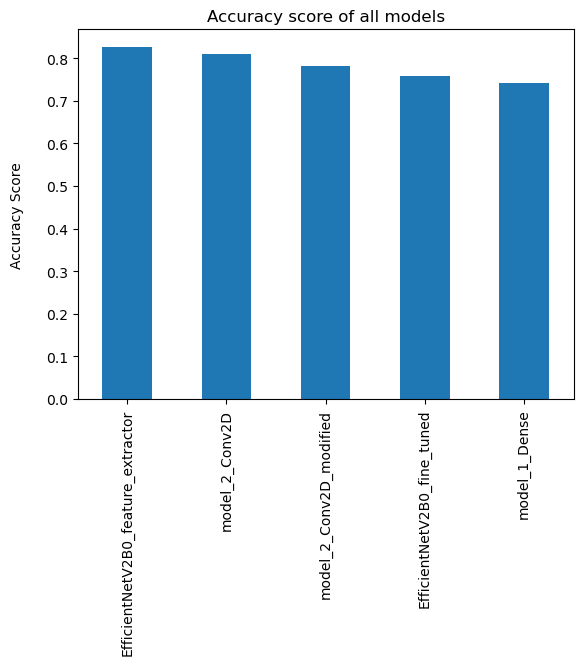

In [95]:
# plotting the Accuracy score of all models
all_model_results.sort_values(by=["accuracy_score"], ascending=False)["accuracy_score"].plot.bar()
plt.title("Accuracy score of all models")
plt.ylabel("Accuracy Score\n");

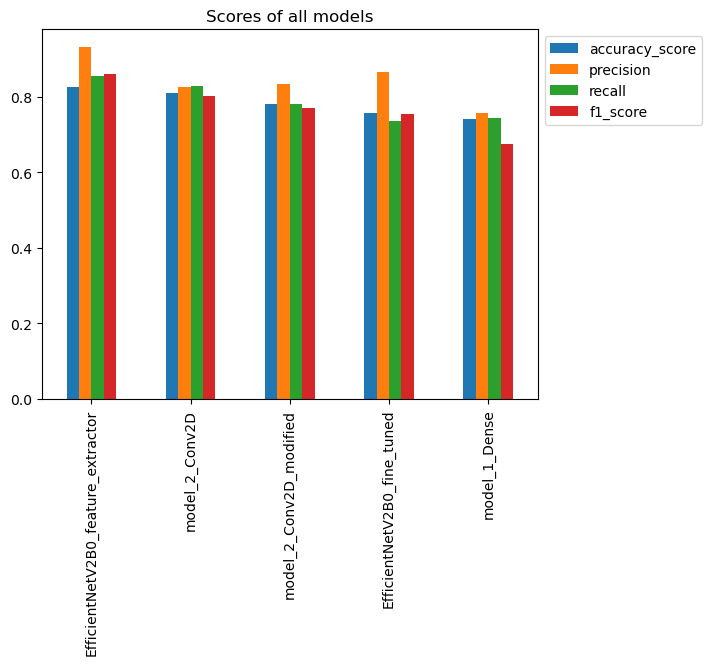

In [96]:
# plotting all scores
all_model_results.sort_values(by=["accuracy_score", "precision", "recall", "f1_score"], ascending=False).plot.bar()
plt.title("Scores of all models")
plt.legend(bbox_to_anchor=(1.0,1.0));

- **By the above graph we have EfficientNetV2B0 feature extractor performing best among all the other models.**

In [97]:
model_3_feature_extractor_results

{'accuracy_score': 0.8261997405966277,
 'precision': 0.9319734723484305,
 'recall': 0.8542573778422835,
 'f1_score': 0.8615965986767162}

## 8. Making Custom Predictions

---

In [98]:
# creating a function to make prediction on custom images
def custom_prediction(model, img_path, rescale=False, org_label=False):
    """
    Returns a plotted image with predicted class and its probability
    """

    # first we need to preprocess the image
    image = tf.io.read_file(img_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, size=[224,224])
    if rescale:
        image = image / 255.
    # rescaling is not needed for EfficientNetV2B0 since it has a rescaling layer

    # making predictions
    pred_probs = model.predict(tf.expand_dims(image, axis=0)) # needs to be expanded due to batched train data
    preds = pred_probs.argmax(axis=1)

    color = "black"
    # if label is specified
    if org_label:
        if org_label == class_names[preds[0]]:
            color="green"
        else:
            color="red"

    # plotting the prediction with image
    plt.figure(figsize=(10,7))
    plt.imshow(plt.imread(img_path))
    plt.title(f"Prediction: {class_names[preds[0]].upper()}\nPrediction Probability: {np.max(pred_probs)*100:.2f}%", color=color)

    # if label is specified
    if org_label:
        plt.suptitle(f"Original: {org_label.upper()}", color="green")

    plt.xticks([])
    plt.yticks([]);

In [99]:
class_names

['COVID19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']

1/1 [==============================] - 2s 2s/step


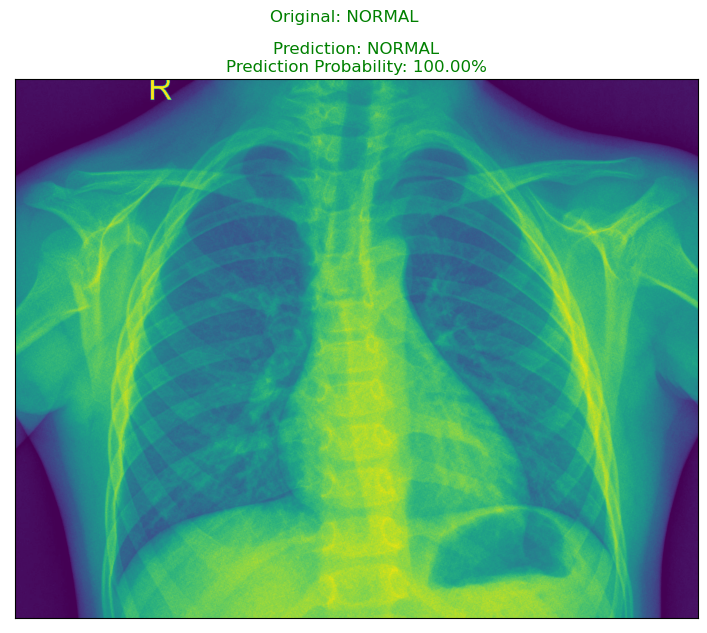

In [100]:
# making predictions on images with known labels
custom_prediction(model=model_3, img_path="Dataset/custom_images/Normal.jpeg", org_label="NORMAL")

1/1 [==============================] - 0s 26ms/step


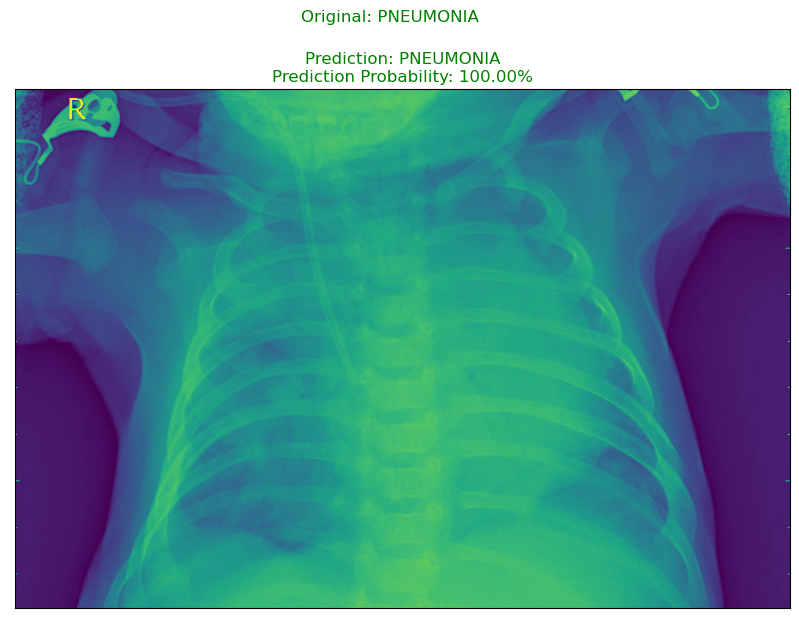

In [101]:
custom_prediction(model=model_3, img_path="Dataset/custom_images/Pneumonia.jpeg", org_label="PNEUMONIA")

1/1 [==============================] - 0s 28ms/step


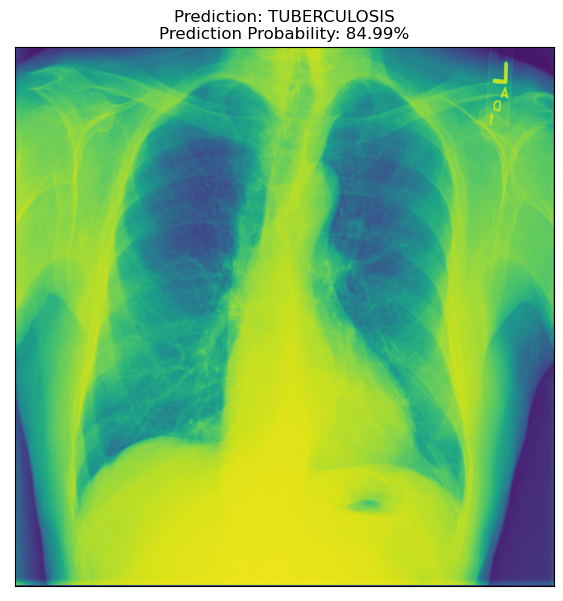

In [102]:
# making predictions on images with unknown labels
custom_prediction(model=model_3, img_path="Dataset/custom_images/unknown.png")

1/1 [==============================] - 0s 23ms/step


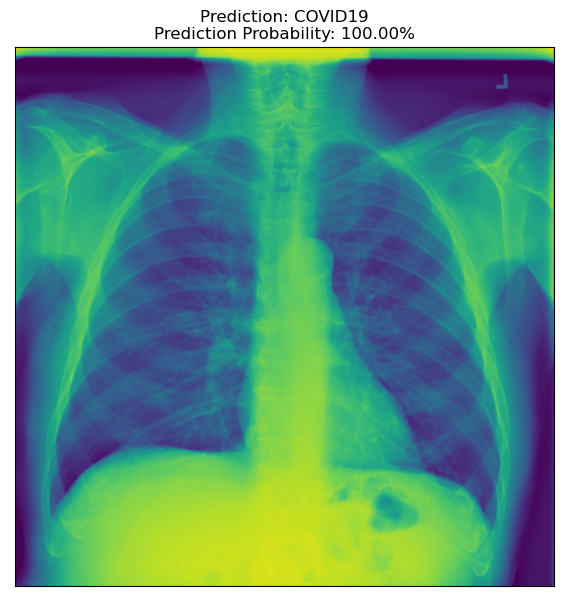

In [103]:
custom_prediction(model=model_3, img_path="Dataset/custom_images/unknown 2.png")

## 10. Summary

In [104]:
all_model_results

,accuracy_score,precision,recall,f1_score
model_1_Dense,0.741894,0.757065,0.743078,0.676131
model_2_Conv2D,0.810636,0.825358,0.829078,0.802991
model_2_Conv2D_modified,0.780804,0.834753,0.781389,0.769674
EfficientNetV2B0_feature_extractor,0.826200,0.931973,0.854257,0.861597
EfficientNetV2B0_fine_tuned,0.757458,0.865712,0.735033,0.754451


- **The EfficientNetV2B0_feature_extractor performed the best out of all the models.**